# Proyek Analisis Data: [GYM Member Exercise]
---

**Kelompok 8**

* Nama: Fernando Manuel
* NIM : 1202223288
* Nama: Safrina Auriya Anantasya Agustine
* NIM : 1202223197
* Nama: Sultan Zaid Zidane
* NIM : 102022300240


Dataset Gym Members Exercise ini memiliki 973 baris dan 15 kolom, dimana dataset tersebut berisi beberapa hal seperti:

* Age: Usia anggota gym.
* Gender: Jenis kelamin anggota gym (Pria atau Wanita).
* Weight (kg): Berat anggota dalam kilogram.
* High (m): Tinggi anggota dalam meter.
* Max_BPM: Denyut jantung maksimum (detak per menit) selama sesi latihan.
* Avg_BPM: Denyut jantung rata-rata selama sesi latihan.
* Resting_BPM: Denyut jantung saat istirahat sebelum latihan.
* Session_Duration (jam): Durasi setiap sesi latihan dalam jam.
* Calories_Burned: Total kalori yang dibakar selama setiap sesi.
* Workout_Type: Jenis latihan yang dilakukan (misalnya, Kardio, Kekuatan, Yoga, HIIT).
* Fat_Percentage: Persentase lemak tubuh anggota.
* Water_Intake (liter): Asupan air harian selama latihan.
* Workout_Frequency (hari/minggu): Jumlah sesi latihan per minggu.
* Experience_Level: Tingkat pengalaman, dari pemula (1) hingga ahli (3).
* BMI: Indeks Massa Tubuh, dihitung dari tinggi dan berat badan.

# **Business Understanding**

* Bagaimana jenis latihan gym dapat mempengaruhi ukuran BMI (Body Mass Index)?

* Bagaimana algoritma logistic regression dapat memprediksi jenis latihan gym berdasarkan atribut anggota gym seperti usia, berat badan, durasi sesi, dan frekuensi latihan?

* Bagaimana algoritma K-Means dapat mengelompokkan anggota gym berdasarkan profil fisik mereka, seperti BMI, persentase lemak tubuh, dan durasi sesi latihan?

# **Data Wrangling**
Ditahap ini kita menggunakan 3 proses Data Wrangling diantaranya adalah:

a. Gathering Data
Mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah yang dihadapi

b. Assesing Data
Penilaian terhadap data untuk menilai kualitas dan struktur data

c. Cleaning Data
Pembersihan data melalui analisis dari permasalahan

## Gathering Data
Pada tahap ini kita mengumpulkan data dan diubah menjadi DataFrame yang akan digunakan.

In [473]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/CuPid168/GYM_Exercise_Kelompok8/refs/heads/main/data/gym_members_exercise_tracking.csv')
df.head(10)

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   
5   56  Female         58.0        1.68      168      156           74   
6   36    Male         70.3        1.72      174      169           73   
7   40  Female         69.7        1.51      189      141           64   
8   28    Male        121.7        1.94      185      127           52   
9   28    Male        101.8        1.84      169      136           64   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   
5                      1.59           1116.0         HIIT            15.5   
6                      1.49           1385.0       Cardio            21.3   
7                      1.27            895.0       Cardio            30.6   
8                      1.03            719.0     Strength            28.9   
9                      1.08            808.0       Cardio            29.7   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   
5                    2.7                              5                 3   
6                    2.3                              3                 2   
7                    1.9                              3                 2   
8                    2.6                              4                 2   
9                    2.7                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39  
5  20.55  
6  23.76  
7  30.57  
8  32.34  
9  30.07

## Assessing Data
Langkah selanjutnya adalah melakukan penilaian kualitas data. Disini kita dapat mengetahui permasalahan dalam data yang dianalisis.

In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [475]:
df.describe()

Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.000000                  0.500000       303.000000       10.000000   
25%      56.000000                  1.040000       720.000000       21.300000   
50%      62.000000                  1.260000       893.000000       26.200000   
75%      68.000000                  1.460000      1076.000000       29.300000   
max      74.000000                  2.000000      1783.000000       35.000000   

       Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
count             973.000000                     973.000000        973.000000   
mean                2.626619                       3.321686          1.809866   
std                 0.600172                       0.913047          0.739693   
min                 1.500000                       2.000000          1.000000   
25%                 2.200000                       3.000000          1.000000   
50%                 2.600000                       3.000000          2.000000   
75%                 3.100000                       4.000000          2.000000   
max                 3.700000                       5.000000          3.000000   

              BMI  
count  973.000000  
mean    24.912127  
std      6.660879  
min     12.320000  
25%     20.110000  
50%     24.160000  
75%     28.560000  
max     49.840000

In [476]:
df.nunique()

Age                               42
Gender                             2
Weight (kg)                      532
Height (m)                        51
Max_BPM                           40
Avg_BPM                           50
Resting_BPM                       25
Session_Duration (hours)         147
Calories_Burned                  621
Workout_Type                       4
Fat_Percentage                   239
Water_Intake (liters)             23
Workout_Frequency (days/week)      4
Experience_Level                   3
BMI                              771
dtype: int64

In [477]:
print("Jumlah data yang terduplikasi ada :",df.duplicated().sum())

Jumlah data yang terduplikasi ada : 0


## Data Cleaning
Pada tahap ini kita akan membetulkan permasalahan yang muncul pada saat kita melakukan assesing data.

In [478]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

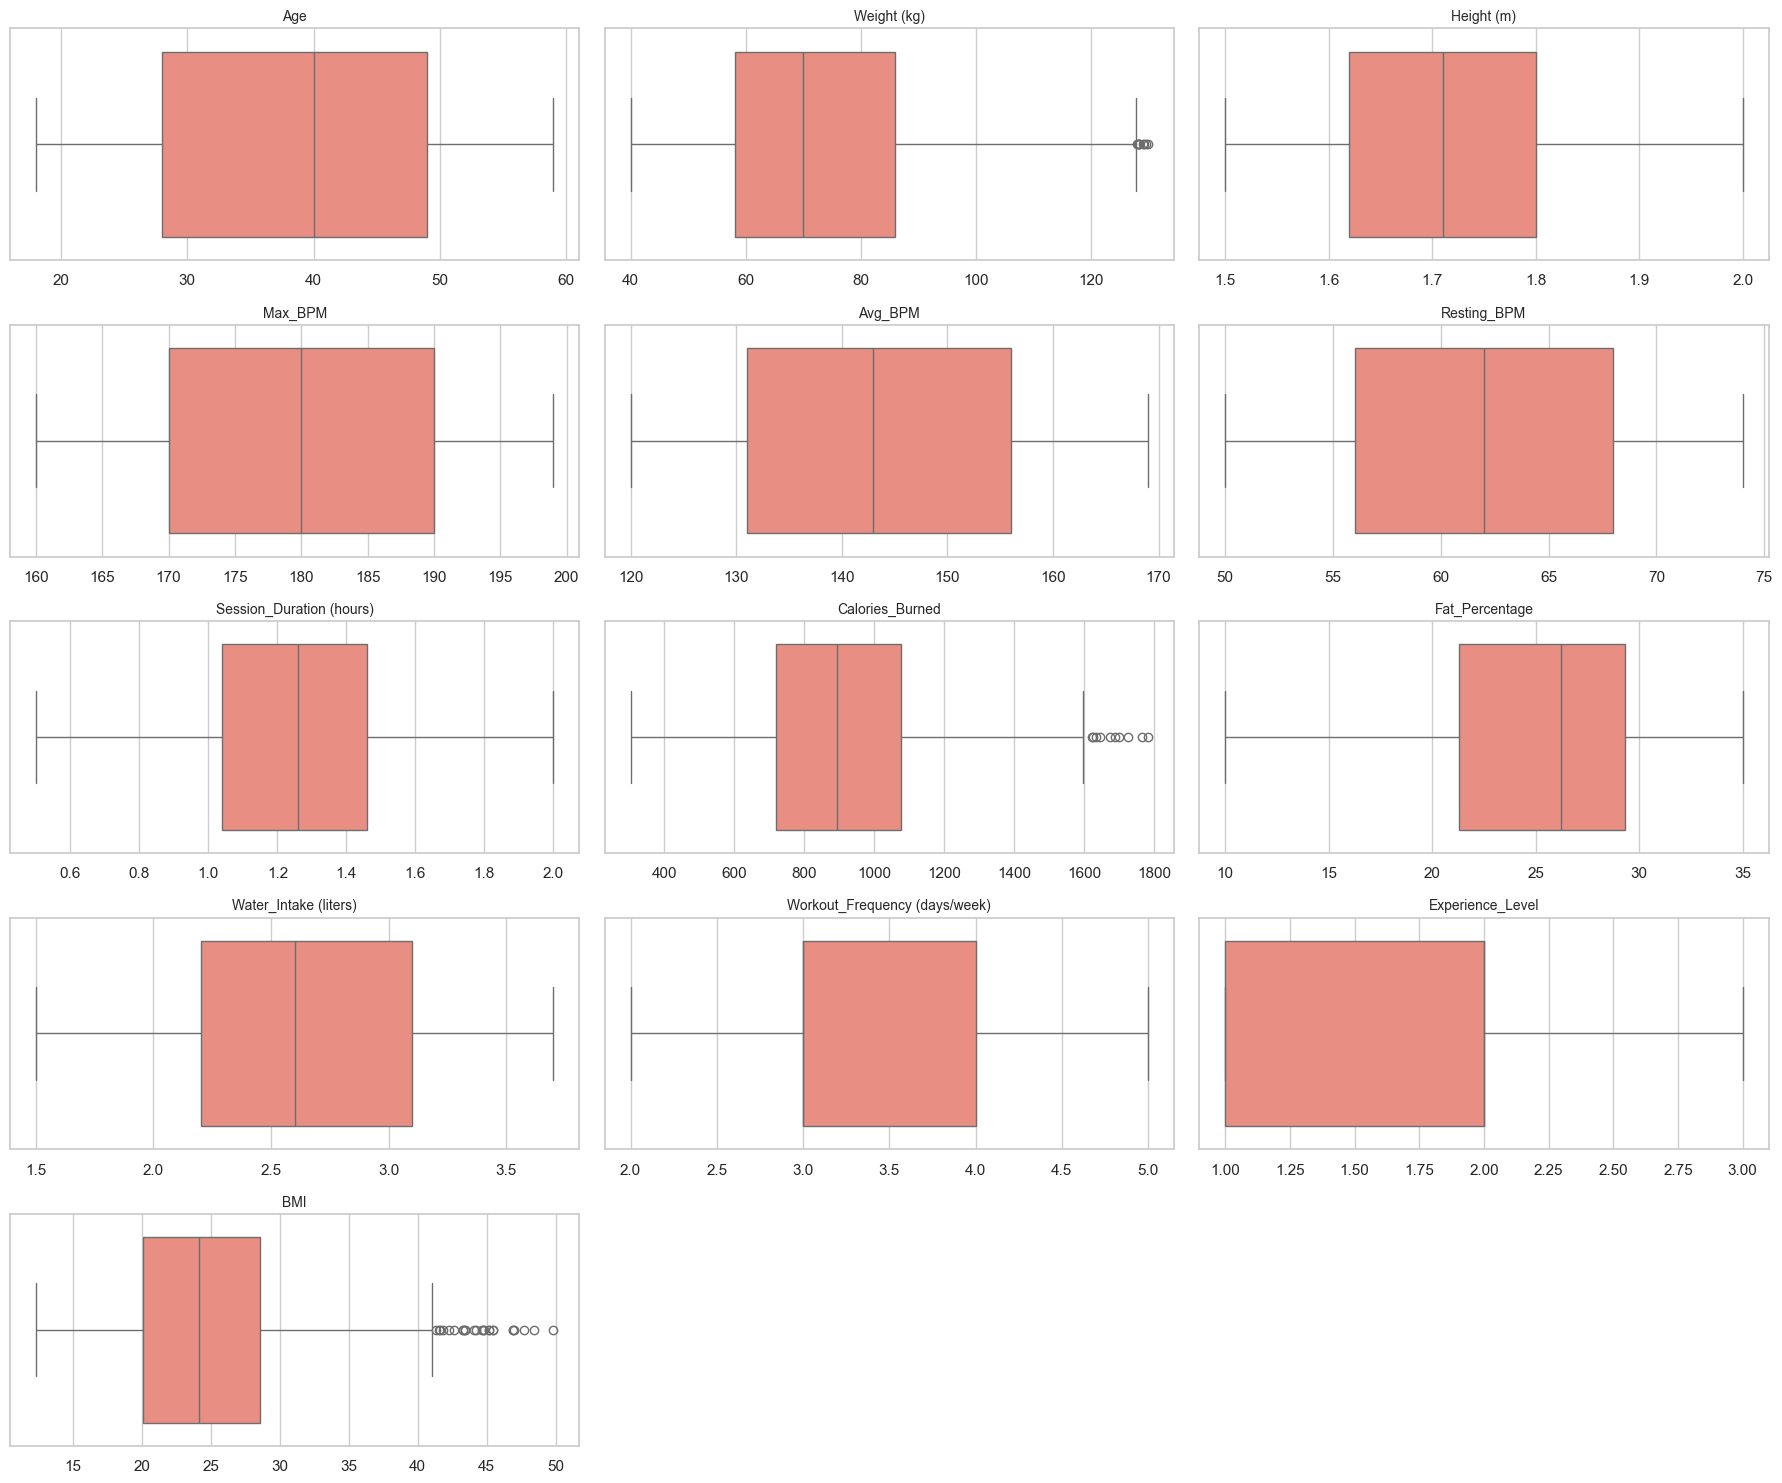

In [479]:
import seaborn as sns
import matplotlib.pyplot as plt

kolom_numerik = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_columns = len(kolom_numerik)
num_cols = 3
num_rows = (num_columns + num_cols - 1) // num_cols

plt.figure(figsize=(18, num_rows * 3))
for i, column in enumerate(kolom_numerik, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column], orient='h', color='salmon')
    plt.title(column, fontsize=10)
    plt.xlabel("")

plt.tight_layout()
plt.show()

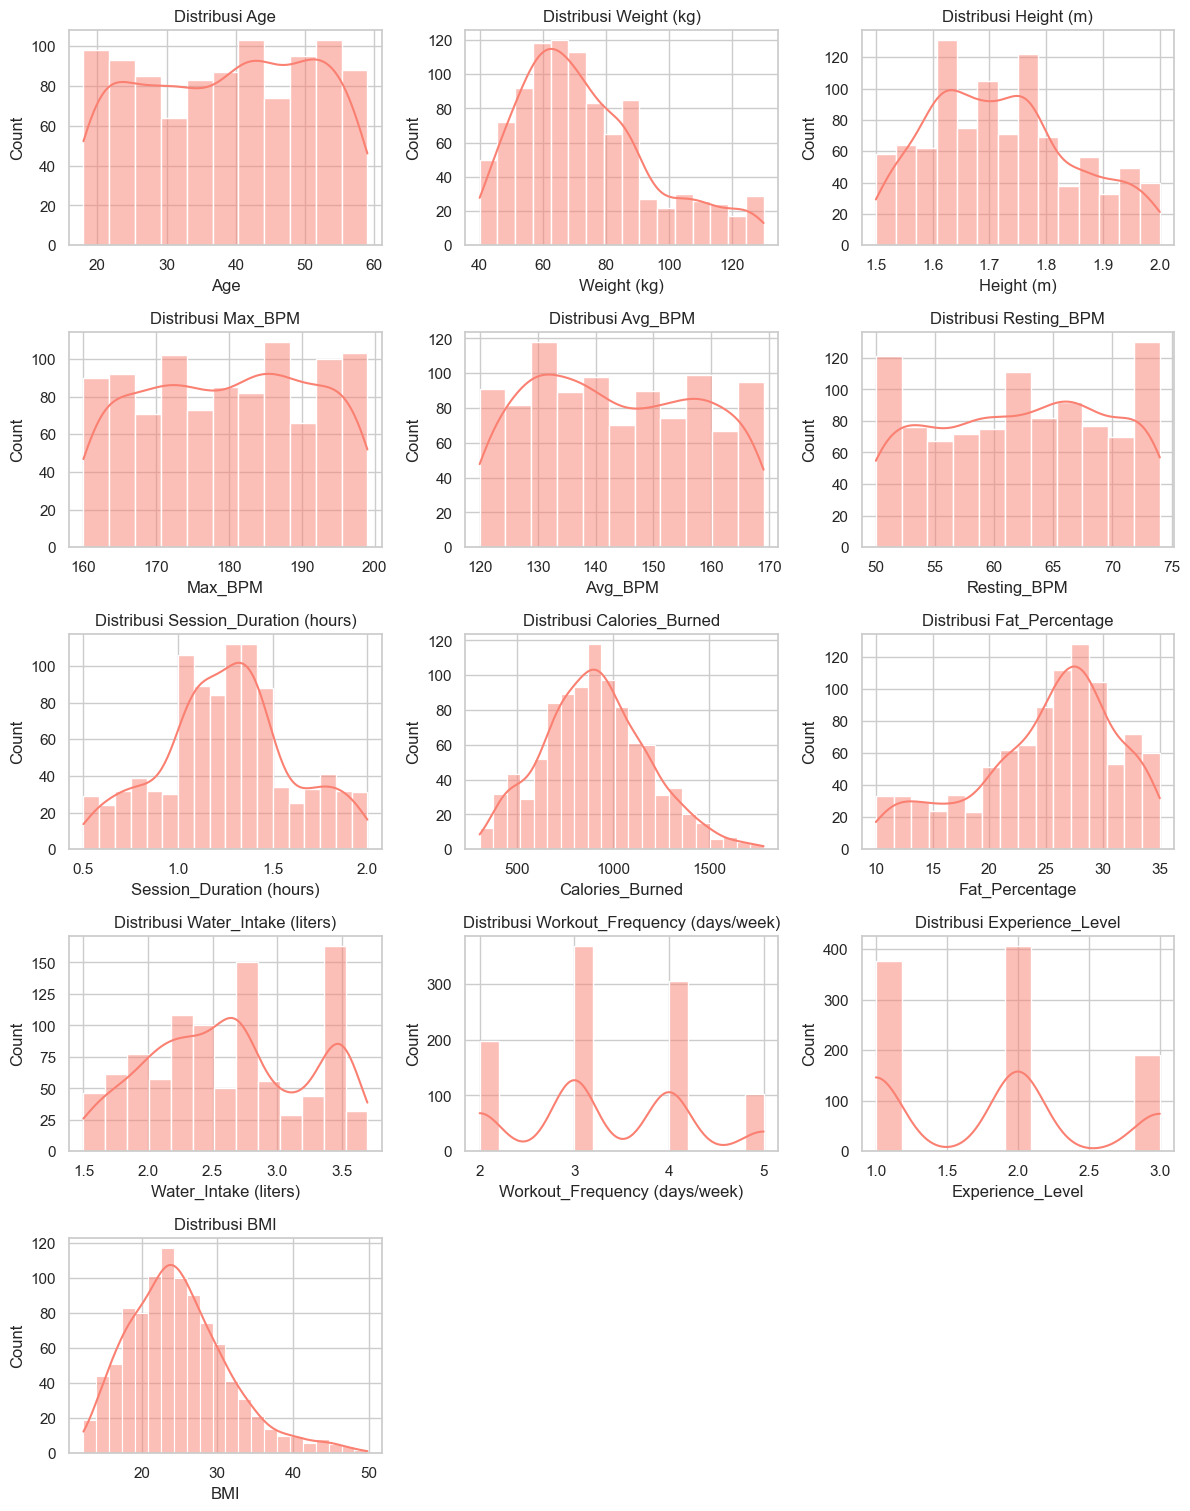

In [480]:
plt.figure(figsize=(12, 45))

for index, col in enumerate(kolom_numerik, 1):
    plt.subplot(15, 3, index)
    sns.histplot(data=df, x=col, kde=True, color='salmon')
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

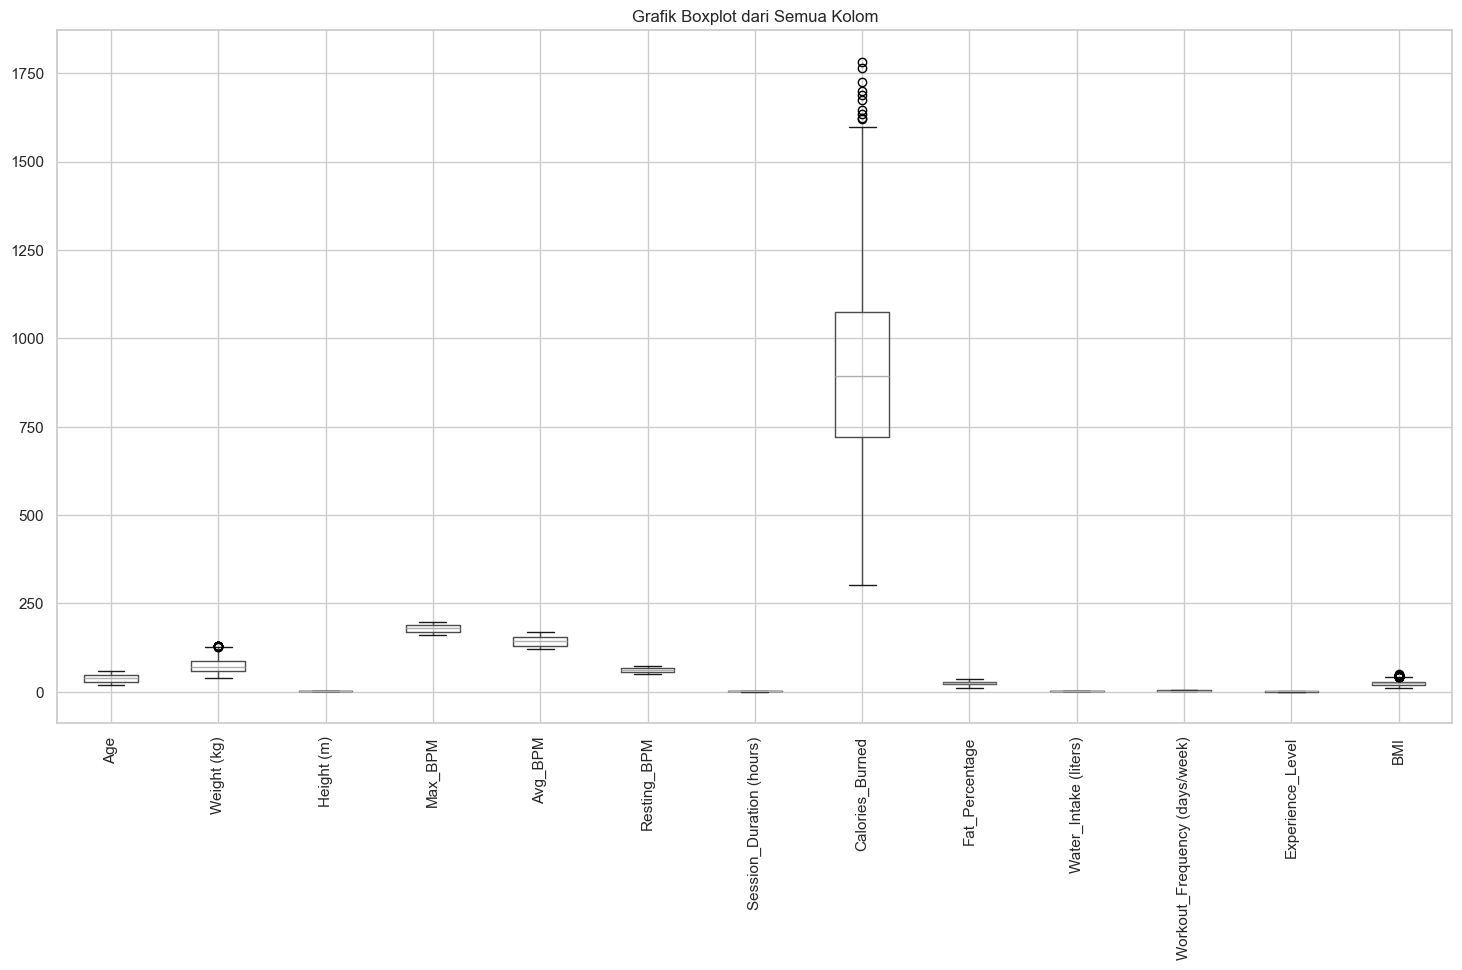

In [481]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom")
plt.show()

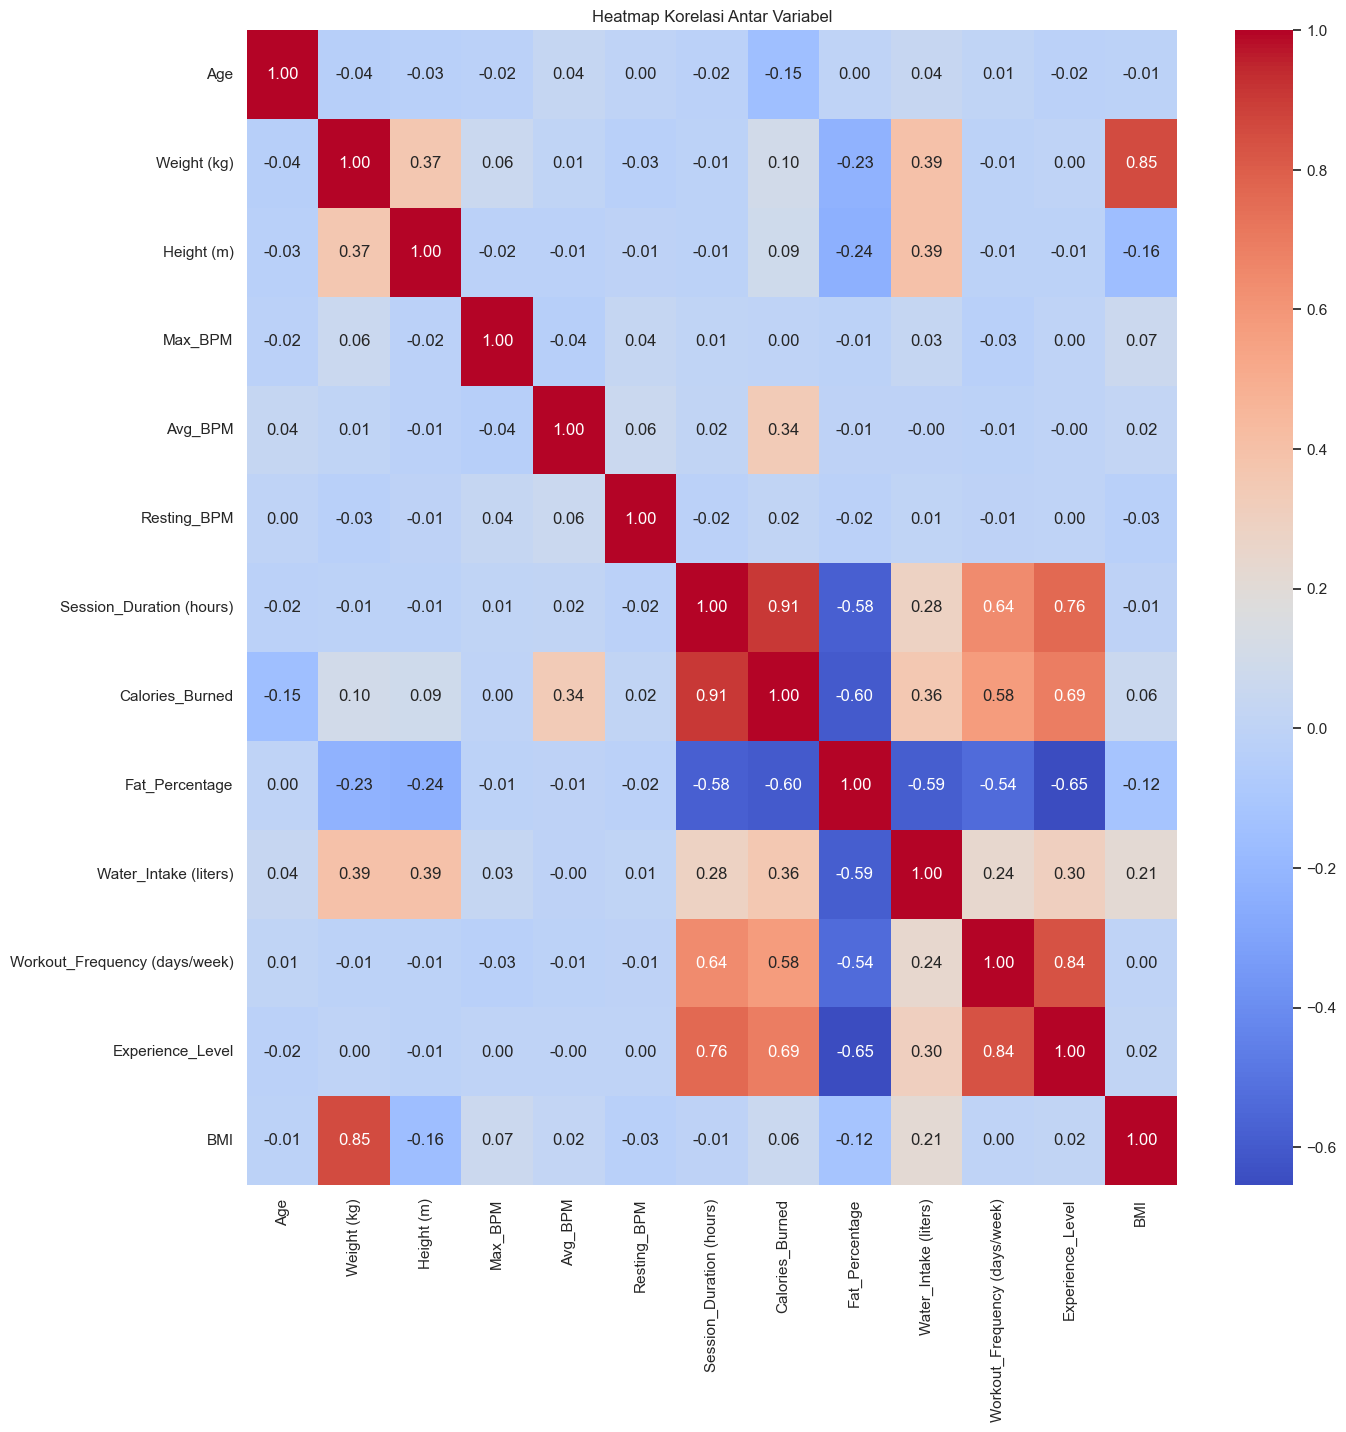

In [482]:
plt.figure(figsize=(15, 15))
correlation_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

 ## Data Preprocessing

In [483]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in ['Gender', 'Workout_Type']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0     56       1         88.3        1.71      180      157           60   
1     46       0         74.9        1.53      179      151           66   
2     32       0         68.1        1.66      167      122           54   
3     25       1         53.2        1.70      190      164           56   
4     38       1         46.1        1.79      188      158           68   
..   ...     ...          ...         ...      ...      ...          ...   
968   24       1         87.1        1.74      187      158           67   
969   25       1         66.6        1.61      184      166           56   
970   59       0         60.4        1.76      194      120           53   
971   32       1        126.4        1.83      198      146           62   
972   46       1         88.7        1.63      166      146           66   

     Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                        1.69           1313.0             3            12.6   
1                        1.30            883.0             1            33.9   
2                        1.11            677.0             0            33.4   
3                        0.59            532.0             2            28.8   
4                        0.64            556.0             2            29.2   
..                        ...              ...           ...             ...   
968                      1.57           1364.0             2            10.0   
969                      1.38           1260.0             2            25.0   
970                      1.72            929.0             0            18.8   
971                      1.10            883.0             1            28.2   
972                      0.75            542.0             2            28.8   

     Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                      3.5                              4                 3   
1                      2.1                              4                 2   
2                      2.3                              4                 2   
3                      2.1                              3                 1   
4                      2.8                              3                 1   
..                     ...                            ...               ...   
968                    3.5                              4                 3   
969                    3.0                              2                 1   
970                    2.7                              5                 3   
971                    2.1                              3                 2   
972                    3.5                              2                 1   

       BMI  
0    30.20  
1    32.00  
2    24.71  
3    18.41  
4    14.39  
..     ...  
968  28.77  
969  25.69  
970  19.50  
971  37.74  
972  33.38  

[973 rows x 15 columns]

In [484]:
gender_mapping = {index: label for index, label in enumerate(label_encoders['Gender'].classes_)}
print("Mapping untuk kolom 'Gender':", gender_mapping)

workout_mapping = {index: label for index, label in enumerate(label_encoders['Workout_Type'].classes_)}
print("Mapping untuk kolom 'Workout_Type':", workout_mapping)

Mapping untuk kolom 'Gender': {0: 'Female', 1: 'Male'}
Mapping untuk kolom 'Workout_Type': {0: 'Cardio', 1: 'HIIT', 2: 'Strength', 3: 'Yoga'}


Tujuan:
* Mengubah data kategorikal menjadi numerik. Kolom seperti Gender, Workout_Type, dan Experience_Level mungkin berisi data berbentuk string (misalnya, "Male", "Female", atau "Beginner"). Karena algoritma machine learning umumnya tidak dapat bekerja langsung dengan data string, LabelEncoder digunakan untuk mengonversi data ini menjadi angka (misalnya, "Male" → 0, "Female" → 1).
* Menyimpan encoder untuk penggunaan di masa depan: label_encoders digunakan untuk menyimpan setiap encoder, sehingga jika perlu, kita dapat mengonversi nilai angka kembali ke kategori asli.

In [485]:
import numpy as np

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

def clean_outlier(df, kolom, metode='zscore', threshold=3):
    if metode == 'zscore':

        z_scores = np.abs((df[kolom] - df[kolom].mean()) / df[kolom].std())
        return df[z_scores < threshold]

    elif metode == 'iqr':

        Q1 = df[kolom].quantile(0.25)
        Q3 = df[kolom].quantile(0.75)
        IQR = Q3 - Q1

        batas_bawah = Q1 - threshold * IQR
        batas_atas = Q3 + threshold * IQR

        return df[(df[kolom] >= batas_bawah) & (df[kolom] <= batas_atas)]

df = clean_outlier(df, numeric_columns, metode='zscore', threshold=2)
df.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  
0  30.20  
1  32.00  
2  24.71  
3  18.41  
4  14.39

In [486]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                      57
Height (m)                       33
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)         48
Calories_Burned                  42
Workout_Type                      0
Fat_Percentage                   54
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                              43
dtype: int64

In [487]:
df.dropna(inplace=True)
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

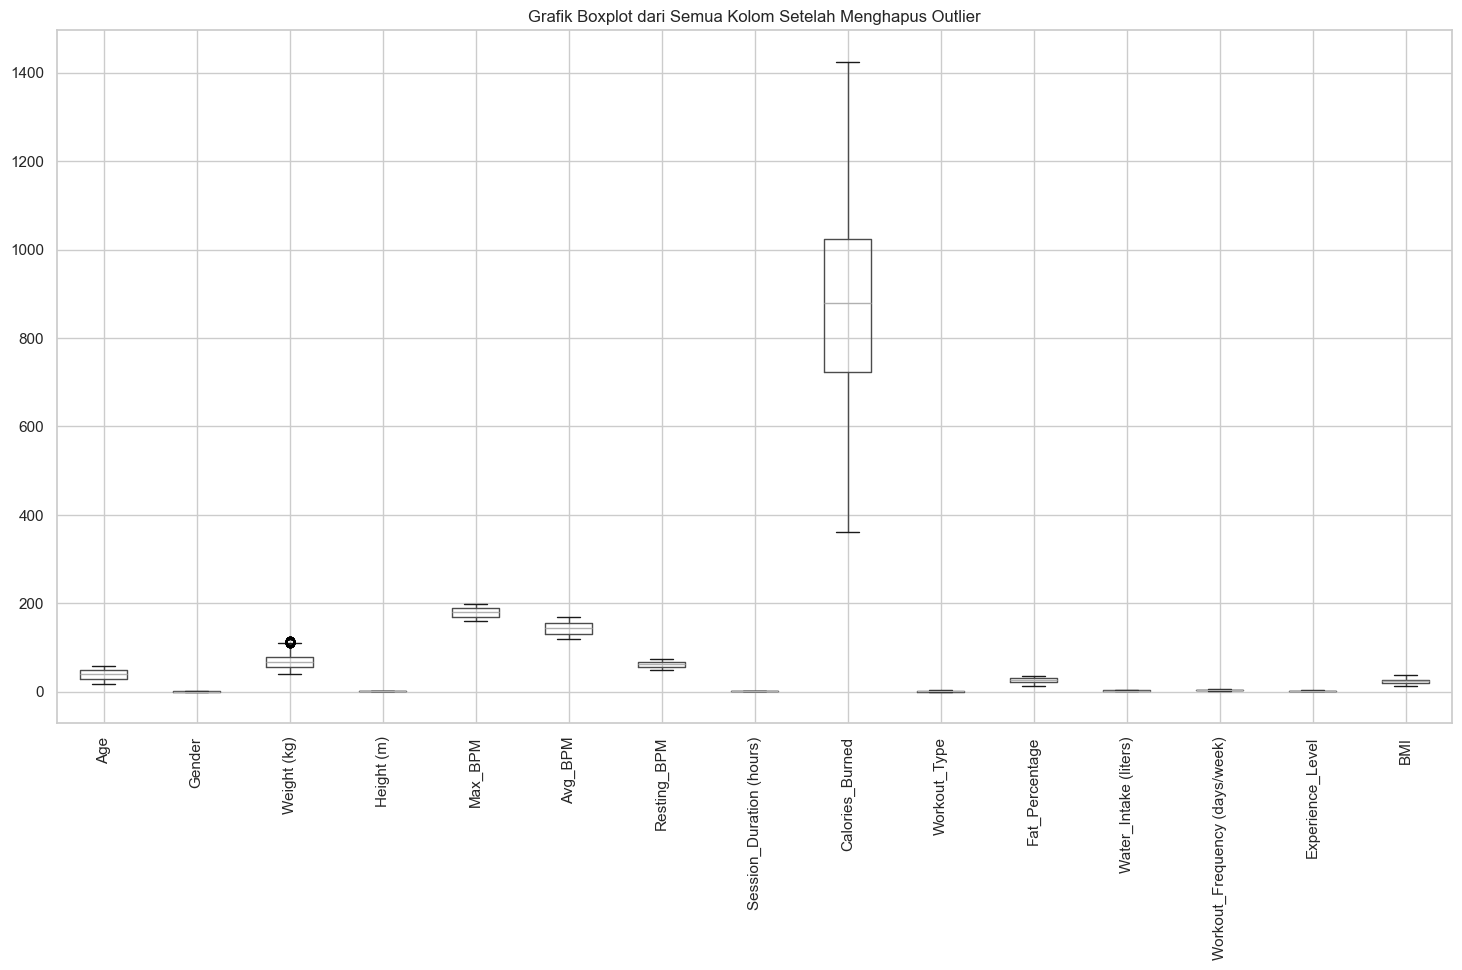

In [488]:
plt.figure(figsize=(18, 9))
df.boxplot(rot=90)
plt.title("Grafik Boxplot dari Semua Kolom Setelah Menghapus Outlier")
plt.show()

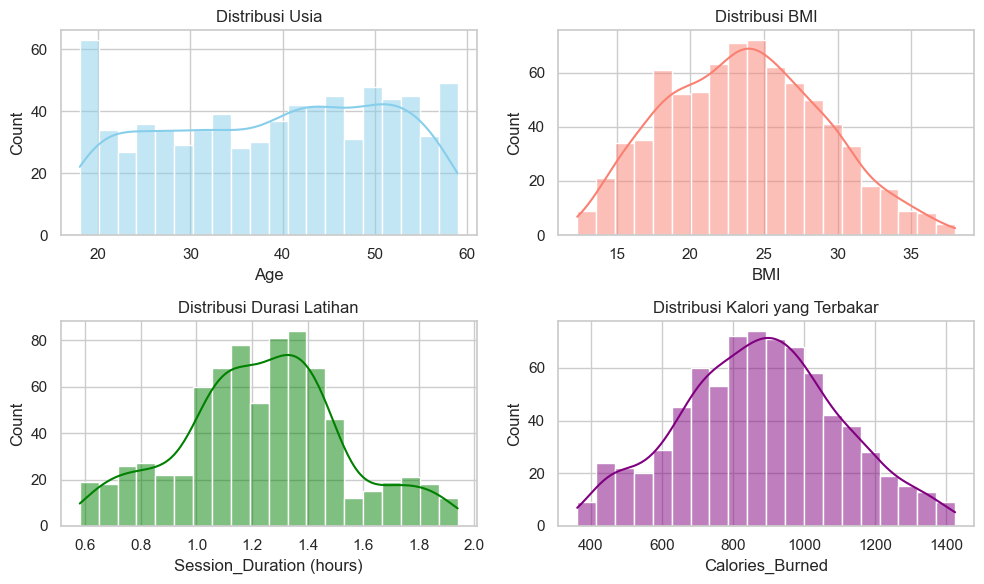

In [489]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribusi Usia")

sns.histplot(df['BMI'], bins=20, kde=True, ax=axes[0, 1], color="salmon")
axes[0, 1].set_title("Distribusi BMI")

sns.histplot(df['Session_Duration (hours)'], bins=20, kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Distribusi Durasi Latihan")

sns.histplot(df['Calories_Burned'], bins=20, kde=True, ax=axes[1, 1], color="purple")
axes[1, 1].set_title("Distribusi Kalori yang Terbakar")

plt.tight_layout()
plt.show()

# KMEANS

In [490]:
from sklearn.cluster import KMeans

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

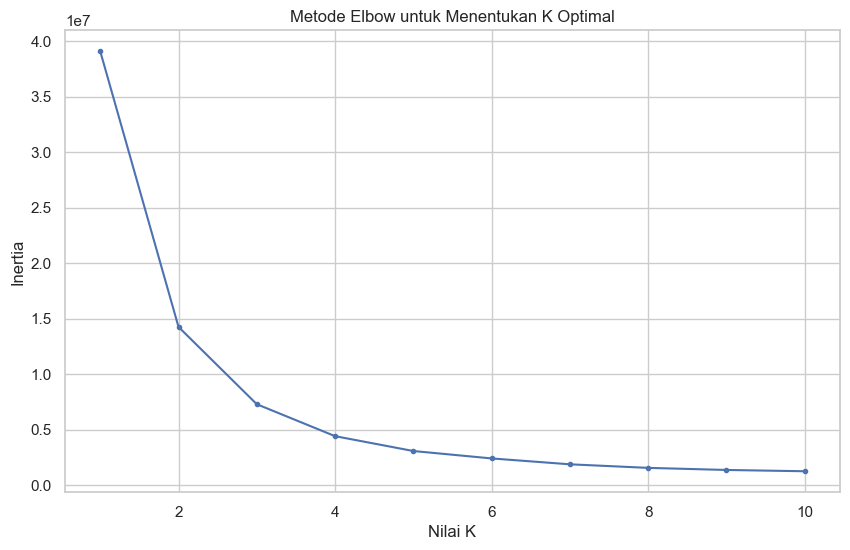

In [491]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertias, marker='.')
plt.grid(True)
plt.xlabel('Nilai K')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan K Optimal')
plt.show()

In [492]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df)

KMeans(n_clusters=2, random_state=42)

In [493]:
df_cluster = df.copy()
df_cluster['Cluster'] = kmeans.labels_
df_cluster.head()

Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56       1         88.3        1.71      180      157           60   
1   46       0         74.9        1.53      179      151           66   
2   32       0         68.1        1.66      167      122           54   
3   25       1         53.2        1.70      190      164           56   
4   38       1         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Workout_Type  Fat_Percentage  \
0                      1.69           1313.0             3            12.6   
1                      1.30            883.0             1            33.9   
2                      1.11            677.0             0            33.4   
3                      0.59            532.0             2            28.8   
4                      0.64            556.0             2            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4                 2   
2                    2.3                              4                 2   
3                    2.1                              3                 1   
4                    2.8                              3                 1   

     BMI  Cluster  
0  30.20        1  
1  32.00        1  
2  24.71        0  
3  18.41        0  
4  14.39        0

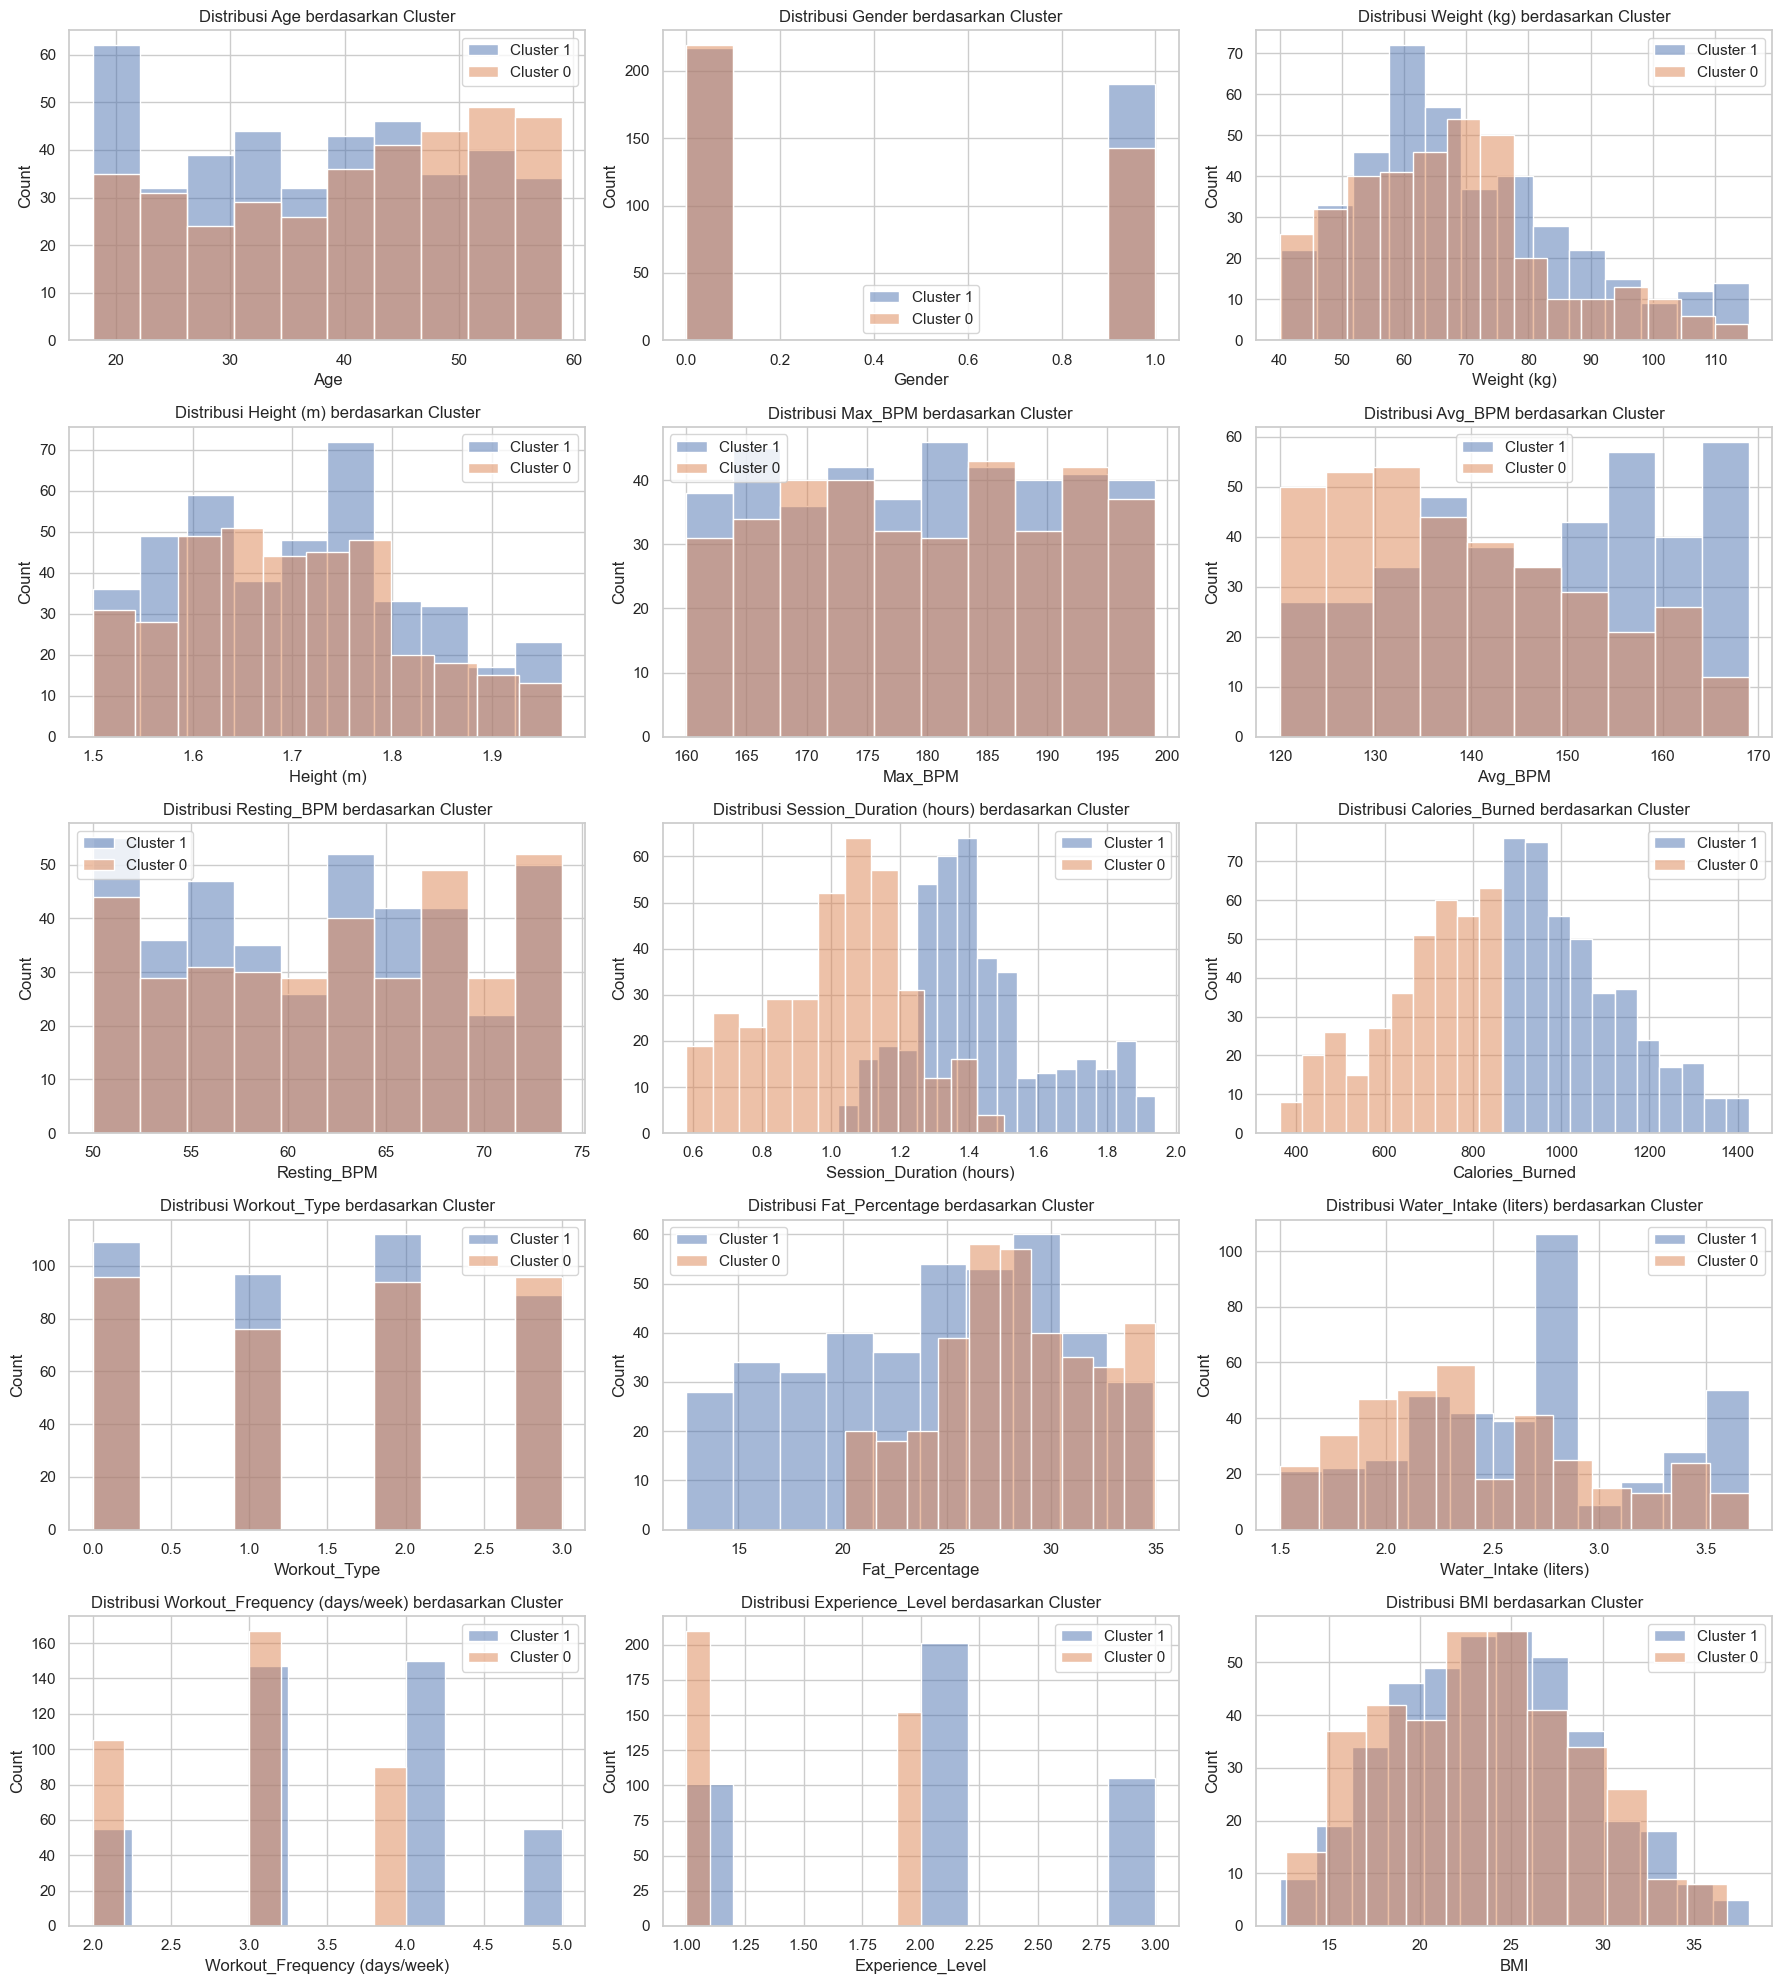

In [494]:
num_cols = 3
num_rows = (len(df.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))

axes = axes.flatten()

for i, kolom in enumerate(df.columns):
    for cluster in df_cluster['Cluster'].unique():
        sns.histplot(data=df_cluster[df_cluster['Cluster'] == cluster],
                     x=kolom,
                     label=f'Cluster {cluster}',
                     alpha=0.5,
                     ax=axes[i])
    axes[i].set_title(f'Distribusi {kolom} berdasarkan Cluster')
    axes[i].legend()

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

beberapa insight yang dapat diambil:
1. Distribusi Usia (Age):
* Cluster 0 memiliki distribusi usia yang lebih muda, dengan mayoritas anggota berusia 20-40 tahun
* Cluster 1 cenderung memiliki anggota yang lebih tua, dengan distribusi usia yang lebih merata antara 30-60 tahun
2. Berat Badan (Weight):
* Cluster 0 memiliki distribusi berat badan yang lebih rendah (40-70 kg)
* Cluster 1 memiliki distribusi berat badan yang lebih tinggi (70-100 kg)
3. Tinggi Badan (Height):
* Tidak ada perbedaan yang signifikan dalam distribusi tinggi badan antar cluster
* Kedua cluster memiliki rentang tinggi badan yang mirip
4. Detak Jantung (Max_BPM, Avg_BPM, Resting_BPM):
* Cluster 0 cenderung memiliki detak jantung maksimum dan rata-rata yang lebih tinggi
* Cluster 1 memiliki detak jantung istirahat yang lebih rendah
5. Durasi Latihan (Session_Duration):
* Cluster 0 cenderung memiliki durasi latihan yang lebih pendek
* Cluster 1 memiliki variasi durasi latihan yang lebih besar
6. Kalori Terbakar (Calories_Burned):
* Cluster 1 memiliki rata-rata pembakaran kalori yang lebih tinggi
* Cluster 0 memiliki pembakaran kalori yang lebih rendah dan konsisten
7. Persentase Lemak (Fat_Percentage):
* Cluster 0 memiliki persentase lemak yang lebih rendah
* Cluster 1 memiliki persentase lemak yang lebih tinggi
8. Asupan Air (Water_Intake):
* Cluster 1 memiliki asupan air yang lebih tinggi
* Cluster 0 memiliki asupan air yang lebih rendah
9. Frekuensi Latihan (Workout_Frequency):
* Tidak ada perbedaan yang sangat signifikan dalam frekuensi latihan antar cluster
* Kedua cluster memiliki distribusi yang mirip
10 Level Pengalaman (Experience_Level):
* Cluster 0 cenderung memiliki level pengalaman yang lebih rendah
* Cluster 1 memiliki variasi level pengalaman yang lebih tinggi
11. BMI:
* Cluster 0 memiliki BMI yang lebih rendah dan normal
* Cluster 1 memiliki BMI yang lebih tinggi, menunjukkan kecenderungan kelebihan berat badan
12. Kesimpulan Umum:
* Cluster 0 cenderung mewakili kelompok yang lebih muda, lebih ringan, dengan intensitas latihan yang lebih tinggi tapi durasi lebih pendek
* Cluster 1 mewakili kelompok yang lebih tua, lebih berat, dengan durasi latihan yang lebih bervariasi dan pembakaran kalori yang lebih tinggi
13. Insight ini dapat digunakan untuk:
* Menyesuaikan program latihan berdasarkan karakteristik masing-masing cluster
* Merancang strategi nutrisi dan hidrasi yang sesuai
* Mengembangkan program pembinaan yang lebih personal berdasarkan level pengalaman
* Menetapkan target yang realistis berdasarkan profil masing-masing cluster

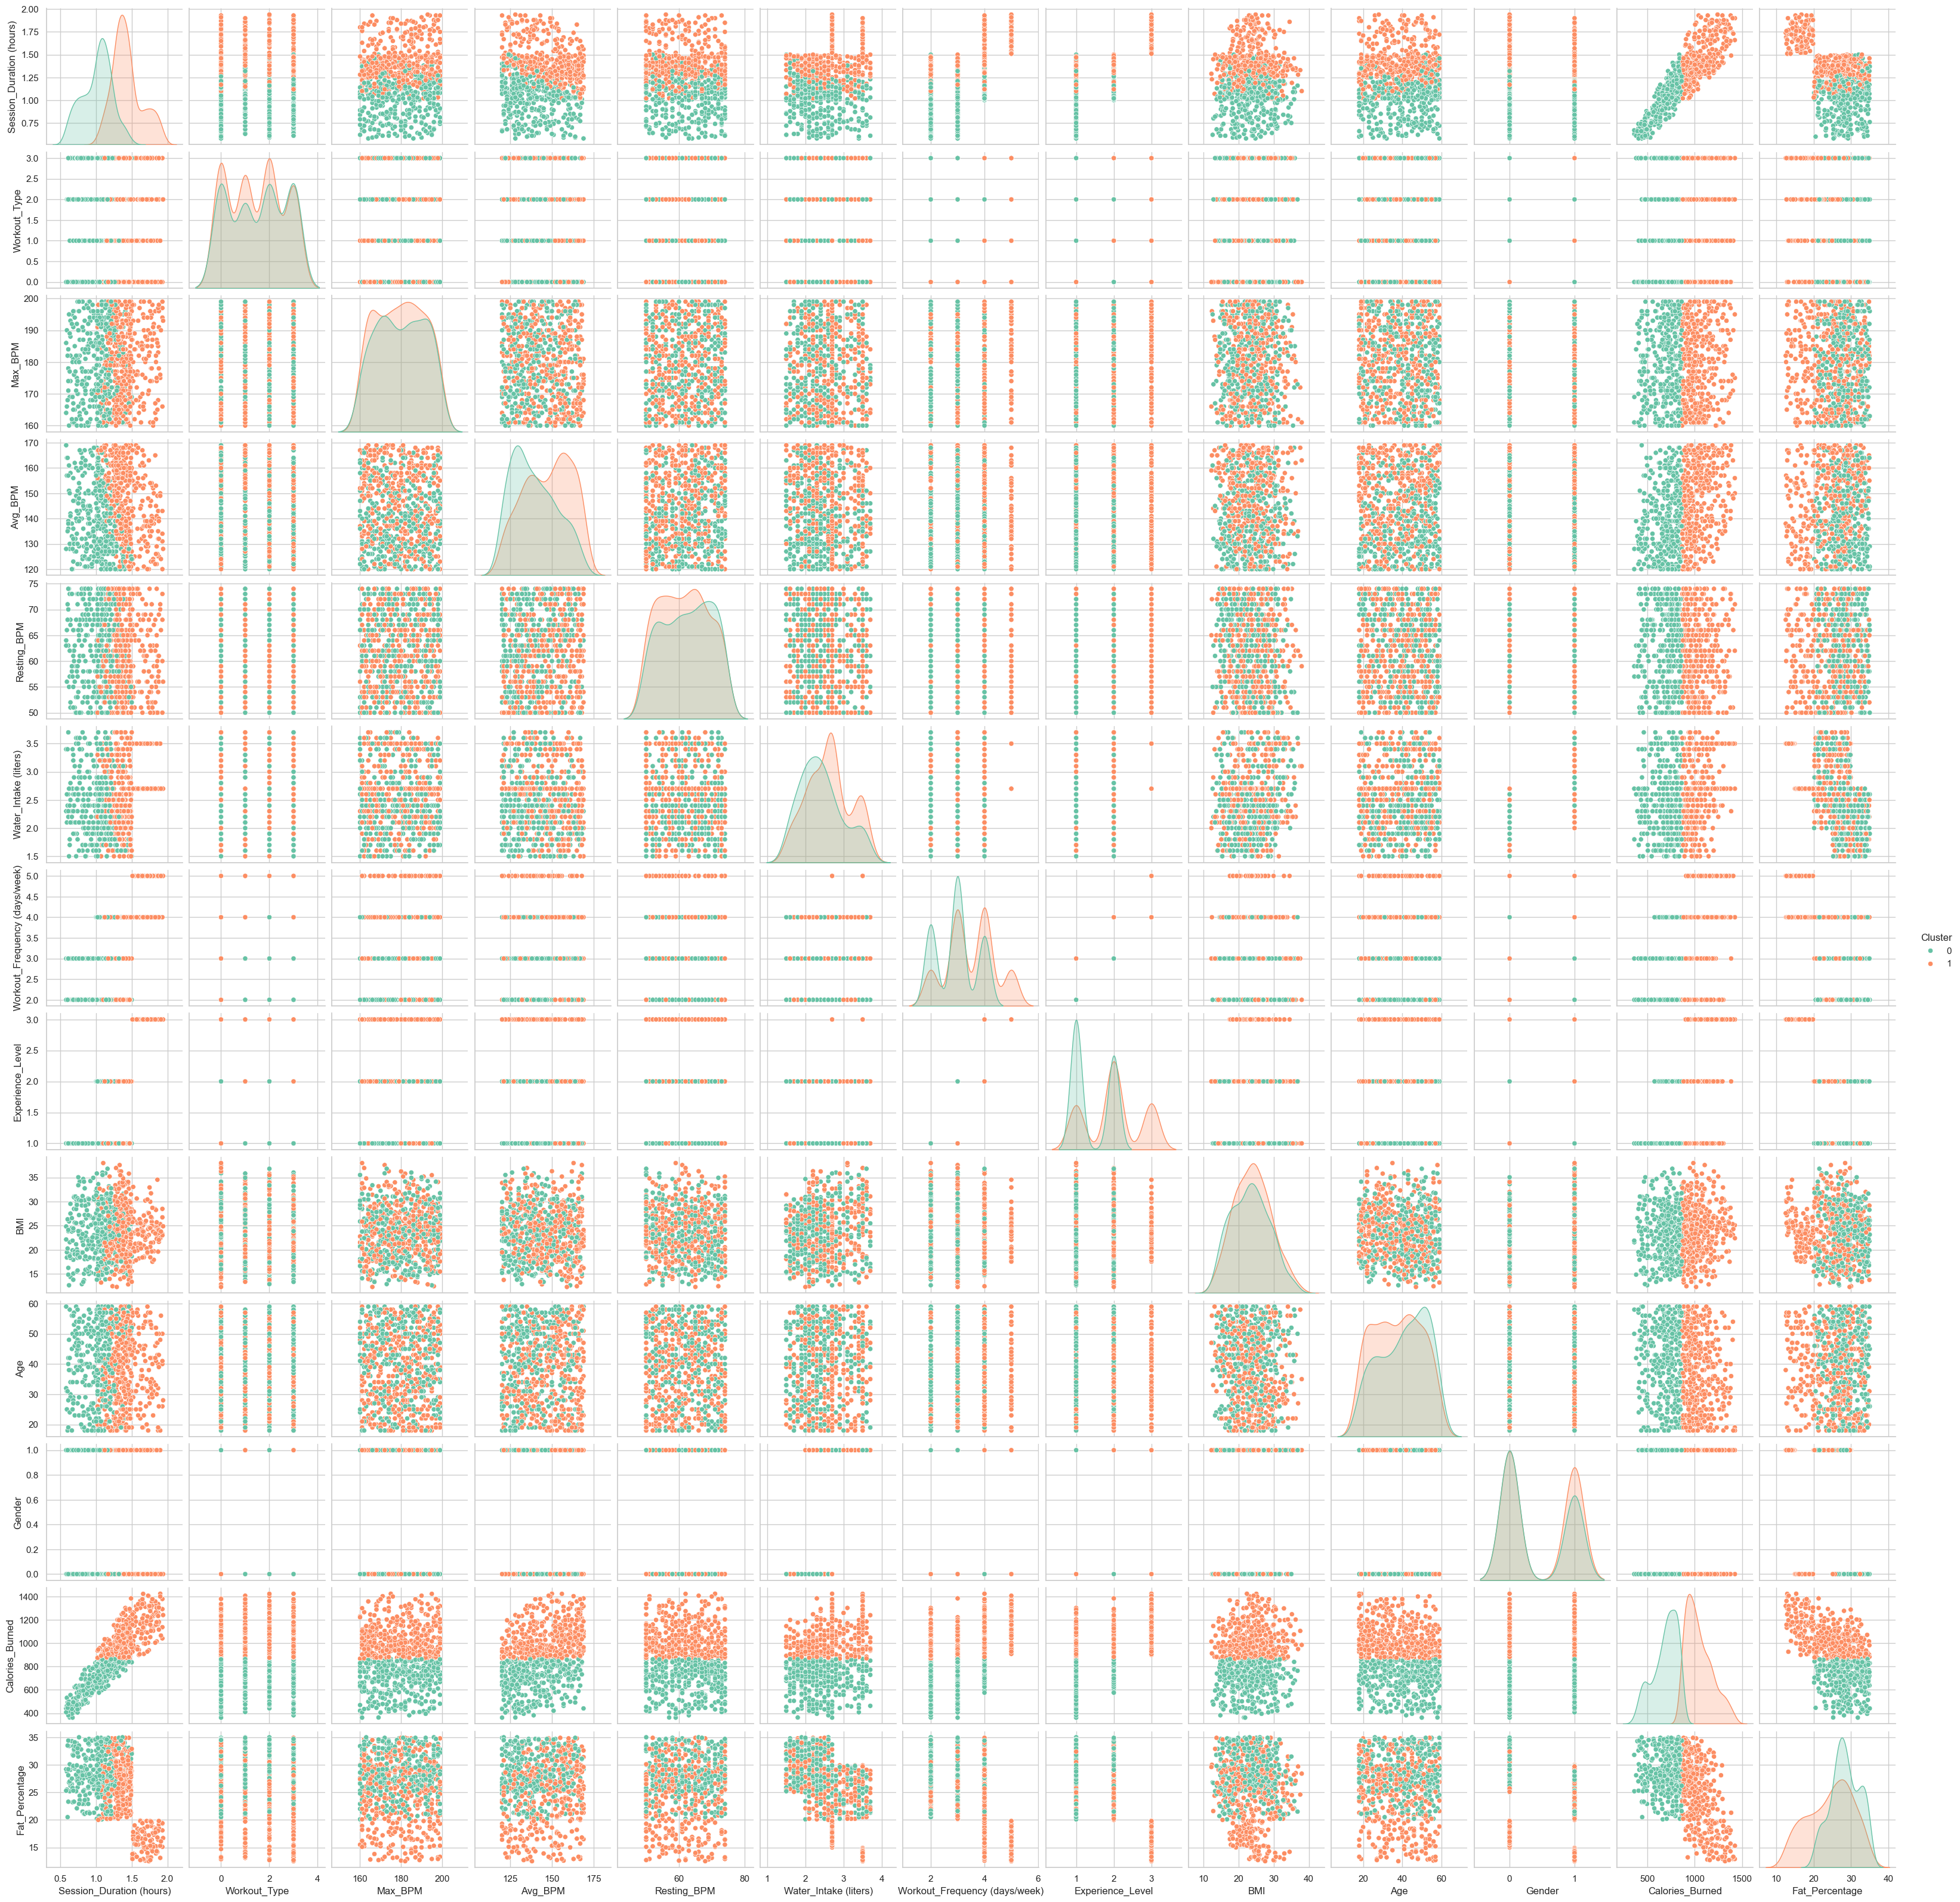

In [495]:
kolom = ['Session_Duration (hours)', 'Workout_Type', 'Max_BPM', 'Avg_BPM',
                 'Resting_BPM', 'Water_Intake (liters)', 'Workout_Frequency (days/week)',
                 'Experience_Level', 'BMI', 'Age', 'Gender', 'Calories_Burned', 'Fat_Percentage']
sns.pairplot(df_cluster[kolom + ['Cluster']], hue='Cluster', diag_kind='kde', palette='Set2')
plt.show()

In [496]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_df = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_df, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = kmeans.labels_
pca_df.head()

PC1        PC2        PC3  Cluster
0  436.271902  15.479098  12.140409        1
1    6.023912   5.681363  11.061538        1
2 -200.508014   3.756738 -15.546123        0
3 -344.473135 -15.488296  15.703766        0
4 -320.801011 -24.103245  13.356468        0

<Axes: xlabel='PC1', ylabel='PC2'>

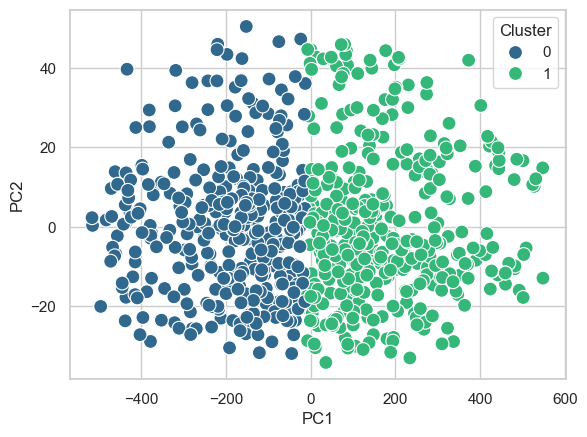

In [497]:
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, s=100)

In [498]:
from sklearn.metrics import silhouette_score

siluet_skor = silhouette_score(df, kmeans.labels_)
print('Silhouette Score: ', siluet_skor)

Silhouette Score:  0.5244732669093549


# KMEAN TUNNING

In [499]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters' : range(2,8),
    'init' : ['k-means++'],
    'n_init' : ['auto'],
    'max_iter' : [100,300,500],
}

In [500]:
grid_search = GridSearchCV(estimator=KMeans(), param_grid=param_grid)
grid_search.fit(df)

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++'], 'max_iter': [100, 300, 500],
                         'n_clusters': range(2, 8), 'n_init': ['auto']})

In [501]:
best_score = -1
best_params = None

for params in grid_search.cv_results_['params']:
    model = KMeans(**params)
    cluster_labels = model.fit_predict(df)
    score = silhouette_score(df, cluster_labels)

    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 'auto'}
Best Silhouette Score: 0.5244732669093549


In [502]:
import pickle

with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)

# Klasifikasi


In [503]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [504]:
def categorize_bmi(bmi):
    if bmi < 25:
      return 'Normal'
    else:
      return 'Obesitas'

df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

X = df.drop(['BMI', 'BMI_Category'], axis=1)
y = df['BMI_Category']

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [506]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [507]:
y_pred = model.predict(X_test)

In [508]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8896


In [509]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.94      0.89      0.91       102
    Obesitas       0.81      0.88      0.84        52

    accuracy                           0.89       154
   macro avg       0.87      0.89      0.88       154
weighted avg       0.89      0.89      0.89       154



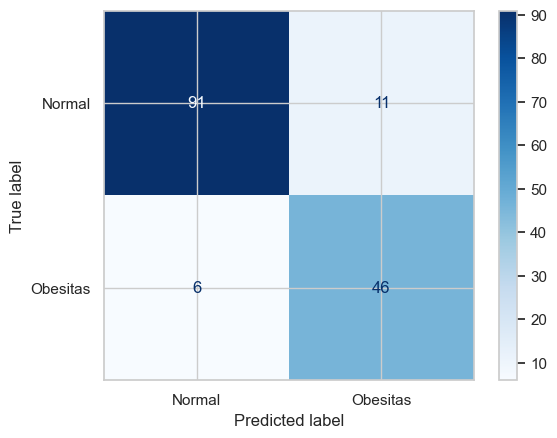

In [510]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap='Blues')

In [511]:
y_prob = model.predict_proba(X_test)[:, 1]

In [512]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Obesitas')

In [513]:
roc_auc = auc(fpr, tpr)
print(f"AUC: {roc_auc:.2f}")

AUC: 0.97


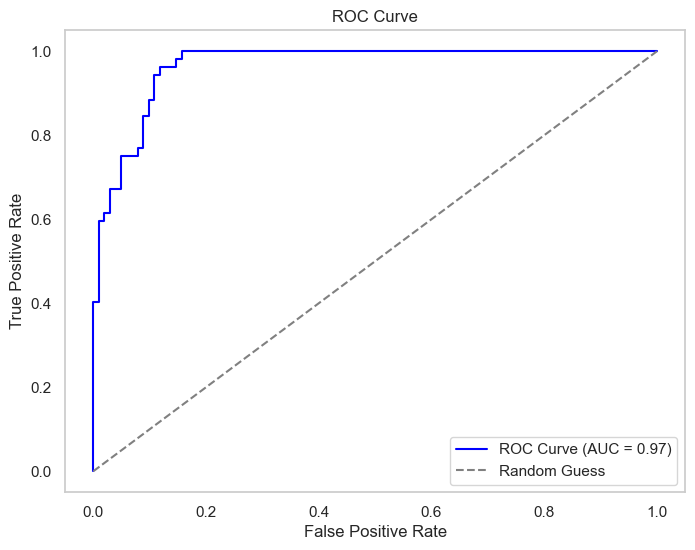

In [514]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [515]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

print("ROC AUC scores for each fold:", cv_scores)
print("Mean ROC AUC score:", cv_scores.mean())

ROC AUC scores for each fold: [0.95424264 0.97002104 0.96125526 0.97232505 0.97861725]
Mean ROC AUC score: 0.9672922462618505


In [516]:
from sklearn.model_selection import cross_val_predict

y_pred_cv = cross_val_predict(model, X, y, cv=5)
accuracy_cv = accuracy_score(y, y_pred_cv)
print(f"Accuracy (Cross-Validation): {accuracy_cv:.2f}")

Accuracy (Cross-Validation): 0.89


# Tuning Model

In [517]:
param_grid = {
    'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
    'solver': ['liblinear'],
    'max_iter': [1000]
}


In [518]:
model = LogisticRegression()

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [519]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'max_iter': [1000], 'solver': ['liblinear']},
             scoring='accuracy')

In [520]:
print("Best params:", grid_search.best_params_)
print(f"Best Score: {grid_search.best_score_:.4f}")

Best params: {'C': 2.0, 'max_iter': 1000, 'solver': 'liblinear'}
Best Score: 0.9073


In [521]:
best_model = grid_search.best_estimator_

In [522]:
y_pred_tuned = best_model.predict(X_test)
print("\nClassification report dari tunning model:")
print(classification_report(y_test, y_pred_tuned))

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy dari tunning model: {accuracy_tuned:.4f}")


Classification report dari tunning model:
              precision    recall  f1-score   support

      Normal       0.96      0.90      0.93       102
    Obesitas       0.83      0.92      0.87        52

    accuracy                           0.91       154
   macro avg       0.89      0.91      0.90       154
weighted avg       0.91      0.91      0.91       154

Accuracy dari tunning model: 0.9091


In [523]:
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]
fpr_tuned, tpr_tuned, thresholds_tuned = roc_curve(y_test, y_prob_tuned, pos_label='Obesitas')
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

print(f"AUC (tuned model): {roc_auc_tuned:.2f}")

AUC (tuned model): 0.98


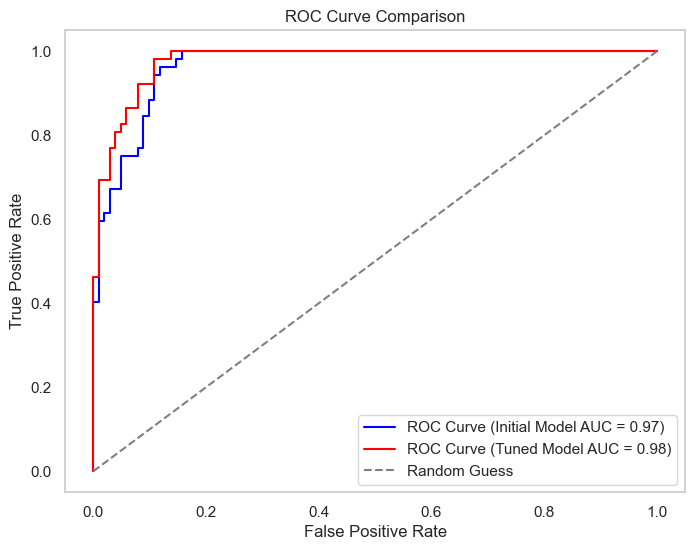

In [524]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (Initial Model AUC = {roc_auc:.2f})', color='blue')
plt.plot(fpr_tuned, tpr_tuned, label=f'ROC Curve (Tuned Model AUC = {roc_auc_tuned:.2f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [525]:
import joblib

joblib.dump(best_model, 'logistic_model.pkl')

print("Model saved successfully!")

Model saved successfully!


# Deployment

In [526]:
!pip install pyngrok


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [527]:
!ngrok config add-authtoken 2wt9cHegxBcvpL4GKQBhz4E2L9q_7WFBCGqmm2eUAVtiRMt4A

Authtoken saved to configuration file: C:\Users\nafis\AppData\Local/ngrok/ngrok.yml


In [528]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [529]:
%%writefile app.py

import streamlit as st
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

@st.cache_data
def load_data():
    df = pd.read_csv('https://raw.githubusercontent.com/CuPid168/GYM_Exercise_Kelompok8/refs/heads/main/data/gym_members_exercise_tracking.csv')
    return df

df = load_data()

st.sidebar.title("Navigasi Dashboard")
page = st.sidebar.radio("Pilih Halaman:", ["Anggota Kelompok", "Klasterisasi KMEANS", "Regresi Logistik"])

if page == "Anggota Kelompok":
    st.title('🧑‍💻 Anggota Kelompok 8 🧑‍💻')
    st.markdown("""
    Berikut adalah anggota kelompok yang berkontribusi dalam proyek ini:

    | Nama | NIM |
    |---|---|
    | Fernando Manuel | 1202223288 |
    | Safrina Auriya Anantasya Agustine | 1202223197 |
    | Sultan Zaid Zidane | 102022300240 |

    """)
    st.balloons()

elif page == "Klasterisasi KMEANS":
    with open('kmeans_model.pkl', 'rb') as file:
        model = pickle.load(file)

    st.title('📊 Gym Member Clustering Prediction Kelompok 8')
    st.write('Aplikasi ini membantu memprediksi cluster member gym berdasarkan karakteristik mereka')

    st.header('Input Karakteristik Member')

    col1, col2 = st.columns(2)

    with col1:
        age = st.number_input('Age',
        min_value=int(df['Age'].min()),
        max_value=int(df['Age'].max()),
        value=int(df['Age'].mean()))

        gender = st.selectbox('Gender', ['Male', 'Female'])

        weight = st.number_input('Weight (kg)',
                min_value=float(df['Weight (kg)'].min()),
                max_value=float(df['Weight (kg)'].max()),
                value=float(df['Weight (kg)'].mean()))

        height = st.number_input('Height (m)',
                min_value=float(df['Height (m)'].min()),
                max_value=float(df['Height (m)'].max()),
                value=float(df['Height (m)'].mean()))

        max_bpm = st.number_input('Max BPM',
                min_value=int(df['Max_BPM'].min()),
                max_value=int(df['Max_BPM'].max()),
                value=int(df['Max_BPM'].mean()))

        avg_bpm = st.number_input('Average BPM',
                min_value=int(df['Avg_BPM'].min()),
                max_value=int(df['Avg_BPM'].max()),
                value=int(df['Avg_BPM'].mean()))

        resting_bpm = st.number_input('Resting BPM',
                min_value=int(df['Resting_BPM'].min()),
                max_value=int(df['Resting_BPM'].max()),
                value=int(df['Resting_BPM'].mean()))

    with col2:
        session_duration = st.number_input('Session Duration (hours)',
                min_value=float(df['Session_Duration (hours)'].min()),
                max_value=float(df['Session_Duration (hours)'].max()),
                value=float(df['Session_Duration (hours)'].mean()))

        calories_burned = st.number_input('Calories Burned',
                min_value=float(df['Calories_Burned'].min()),
                max_value=float(df['Calories_Burned'].max()),
                value=float(df['Calories_Burned'].mean()))

        workout_type = st.selectbox('Workout Type', ['Cardio', 'Strength', 'HIIT', 'Yoga'])

        fat_percentage = st.number_input('Fat Percentage',
                min_value=float(df['Fat_Percentage'].min()),
                max_value=float(df['Fat_Percentage'].max()),
                value=float(df['Fat_Percentage'].mean()))

        water_intake = st.number_input('Water Intake (liters)',
                min_value=float(df['Water_Intake (liters)'].min()),
                max_value=float(df['Water_Intake (liters)'].max()),
                value=float(df['Water_Intake (liters)'].mean()))

        workout_frequency = st.slider('Workout Frequency (days/week)',
                min_value=int(df['Workout_Frequency (days/week)'].min()),
                max_value=int(df['Workout_Frequency (days/week)'].max()),
                value=int(df['Workout_Frequency (days/week)'].mean()))

        experience_level = st.selectbox('Experience Level', [1, 2, 3],
                help='1: Beginner, 2: Intermediate, 3: Advanced')

        bmi = st.number_input('BMI',
                min_value=float(df['BMI'].min()),
                max_value=float(df['BMI'].max()),
                value=float(df['BMI'].mean()))

        gender_encoded = 1 if gender == 'Male' else 0
        workout_type_mapping = {'Cardio': 0, 'Strength': 1, 'HIIT': 2, 'Yoga': 3}
        workout_type_encoded = workout_type_mapping[workout_type]

    if st.button('Predict Cluster'):
        try:
            input_data = np.array([[
            age, gender_encoded, weight, height, max_bpm, avg_bpm,
            resting_bpm, session_duration, calories_burned, workout_type_encoded,
            fat_percentage, water_intake, workout_frequency, experience_level, bmi
        ]])

            cluster = model.predict(input_data)[0]

            st.header('Hasil Prediksi')

            if cluster == 0:
                st.success('Member termasuk dalam Cluster 1: Member High Performance')
                st.write("""
                Karakteristik Member High Performance:
                - Memiliki rata-rata kalori terbakar sangat tinggi (>1000 kalori)
                - Durasi latihan konsisten dan lebih lama (>1.5 jam)
                - Heart rate optimal (Max BPM 170-190, Avg BPM 150-170)
                - Fat percentage rendah (<20%)
                - Water intake tinggi (>3 liter)
                - Workout frequency tinggi (4-5 hari/minggu)
                - Experience level advanced (level 3)

                Rekomendasi:
                - Tingkatkan intensitas dengan program HIIT atau strength training
                - Tambahkan variasi latihan untuk mencegah plateau
                - Fokus pada target spesifik (muscle gain/endurance)
                - Pertahankan nutrisi dan hidrasi optimal
                - Ikuti program kompetitif atau challenge
                """)
            else:
                st.warning('Member termasuk dalam Cluster 2: Member Development')
                st.write("""
                Karakteristik Member Development:
                - Kalori terbakar moderate (500-800 kalori)
                - Durasi latihan lebih pendek (<1 jam)
                - Heart rate moderate (Max BPM 150-170, Avg BPM 120-140)
                - Fat percentage lebih tinggi (>25%)
                - Water intake moderate (1.5-2.5 liter)
                - Workout frequency moderate (2-3 hari/minggu)
                - Experience level pemula-menengah (level 1-2)

                Rekomendasi:
                - Mulai dengan program dasar fokus pada form dan teknik
                - Tingkatkan durasi latihan secara bertahap
                - Kombinasikan cardio ringan dengan strength training dasar
                - Tetapkan target mingguan yang realistis
                - Tingkatkan frekuensi latihan secara bertahap
                - Edukasi nutrisi dan pentingnya hidrasi
                - Sediakan personal trainer untuk guidance
                """)

        except Exception as e:
            st.error(f'Terjadi kesalahan dalam prediksi: {str(e)}')

    st.header('Cluster Distribution')
    if st.checkbox('Show Cluster Distribution'):
        try:
            cluster_dist = pd.Series(model.labels_).value_counts()
            st.bar_chart(cluster_dist)
            st.write('Cluster Centers:', model.cluster_centers_)
        except Exception as e:
                st.error(f'Terjadi kesalahan dalam menampilkan distribusi cluster: {str(e)}')


elif page == "Regresi Logistik":
    st.title('🎯 Gym Member BMI Prediction Kelompok 8')
    st.write('Aplikasi ini memprediksi Kategori BMI (Normal atau Obesitas) hanya menggunakan 4 fitur.')
    st.info("Catatan: Model ini dilatih *setiap kali* tombol prediksi ditekan, menggunakan 4 fitur yang dipilih.")

    def categorize_bmi(bmi):
        if bmi < 25:
            return 'Normal'
        else:
            return 'Obesitas'

    if 'BMI_Category' not in df.columns:
        df['BMI_Category'] = df['BMI'].apply(categorize_bmi)

    features = ['Age', 'Weight (kg)', 'Session_Duration (hours)', 'Workout_Frequency (days/week)']

    def train_bmi_model(data_frame, feature_list):
        X = data_frame[feature_list]
        y = data_frame['BMI_Category']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, solver='liblinear'))
        model_pipeline.fit(X_train, y_train)

        return model_pipeline, X_test, y_test

    age_lr = st.number_input('Usia', min_value=int(df['Age'].min()), max_value=int(df['Age'].max()), value=int(df['Age'].mean()), key='age_lr_4f')
    weight_lr = st.number_input('Berat Badan (kg)', min_value=float(df['Weight (kg)'].min()), max_value=float(df['Weight (kg)'].max()), value=float(df['Weight (kg)'].mean()), key='weight_lr_4f')
    session_duration_lr = st.number_input('Durasi Sesi (jam)', min_value=float(df['Session_Duration (hours)'].min()), max_value=float(df['Session_Duration (hours)'].max()), value=float(df['Session_Duration (hours)'].mean()), key='session_lr_4f')
    workout_frequency_lr = st.number_input('Frekuensi Latihan (hari/minggu)', min_value=int(df['Workout_Frequency (days/week)'].min()), max_value=int(df['Workout_Frequency (days/week)'].max()), value=int(df['Workout_Frequency (days/week)'].mean()), key='freq_lr_4f')

    if st.button('Prediksi Kategori BMI'):
        try:
            lr_model, X_test, y_test = train_bmi_model(df, features)

            input_features = np.array([[age_lr, weight_lr, session_duration_lr, workout_frequency_lr]])

            prediction = lr_model.predict(input_features)
            prediction_proba = lr_model.predict_proba(input_features)[0]

            st.subheader('Hasil Prediksi')
            if prediction[0] == 'Normal':
                st.success(f'Kategori BMI yang Diprediksi: **{prediction[0]}**')
            else:
                st.error(f'Kategori BMI yang Diprediksi: **{prediction[0]}**')

            st.write(f"Probabilitas Normal: {prediction_proba[list(lr_model.classes_).index('Normal')]:.2%}")
            st.write(f"Probabilitas Obesitas: {prediction_proba[list(lr_model.classes_).index('Obesitas')]:.2%}")

            st.markdown("---")

            st.subheader('Evaluasi Model: Confusion Matrix')
            y_pred = lr_model.predict(X_test)

            cm = confusion_matrix(y_test, y_pred, labels=lr_model.classes_)

            fig, ax = plt.subplots(figsize=(6, 4))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                        xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
            plt.ylabel('Aktual')
            plt.xlabel('Prediksi')
            plt.title('Confusion Matrix')

            st.pyplot(fig)

        except Exception as e:
            st.error(f'Terjadi kesalahan: {str(e)}')

Overwriting app.py


In [530]:
from pyngrok import ngrok
import threading
import time
import os

In [531]:
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501")

thread = threading.Thread(target=run_streamlit, daemon=True)
thread.start()

time.sleep(5)

public_url = ngrok.connect(addr='8501')
print(f"Streamlit app is live at: {public_url}")

t=2025-05-27T21:56:49+0700 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
t=2025-05-27T21:56:49+0700 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration fil

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.